## What is regression

- Regression is used to make prediction from data by learning about the relationship between a given set of dependent and independent variables.

### Prediction using linear regression

- <b>Linear regression</b> is one of the most widely known modeling techniques.
- <b>Simple linear regression</b> is an example of linear regression with only one independent variable and on dependent variable.
- To predict price y and the relationship of A the equation is Y = A*x + b
- 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2024-06-27 17:48:39.723834: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 17:48:39.723860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 17:48:39.724571: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-27 17:48:39.729402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


- Demonstate the idea by generating a scatter plot to demonstate the idea

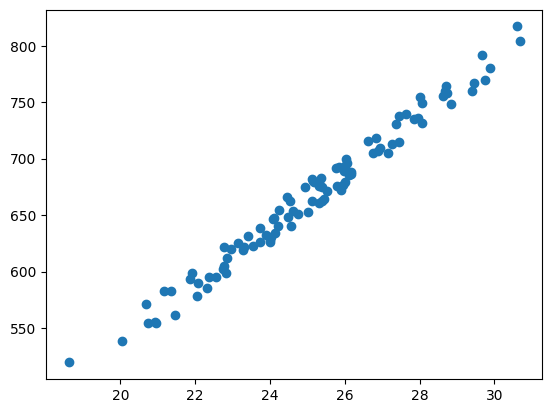

In [3]:
# generate a random data
np.random.seed(0)

area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20, 50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=["area", "price"])
plt.scatter(data["area"], data["price"])
plt.show()

In [4]:
## Now calculate the two regression coefficents
W = sum(price*(area - np.mean(area))) / sum((area - np.mean(area))**2)
b = np.mean(price) - W*np.mean(area)
print("The regression coefficients are:", W, b)

The regression coefficients are: 24.815544052284988 43.4989785533412
